#INF2178 Final 
Team 43: Yifei Chen, Jingjing Wang

Date: April 16, 2023

Dataset: https://github.com/shionguha/inf2178-expdesignfordatascience-w23/blob/31266c7d0582d23314e855d057e94dc2f7c36c98/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv 

#1.Preprocessing

###Import dataset 

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Ars.csv to Ars.csv


###Inspect dataset 

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#load the dataset
df = pd.read_csv("Ars.csv")
df.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [ ]:
#inspect dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65276 non-null  int64  
 1   Arrest_Month                     65276 non-null  object 
 2   EventID                          65276 non-null  int64  
 3   ArrestID                         64807 non-null  float64
 4   PersonID                         65276 non-null  int64  
 5   Perceived_Race                   65272 non-null  object 
 6   Sex                              65276 non-null  object 
 7   Age_group__at_arrest_            65252 non-null  object 
 8   Youth_at_arrest__under_18_years  65276 non-null  object 
 9   ArrestLocDiv                     65276 non-null  object 
 10  StripSearch                      65276 non-null  int64  
 11  Booked                           65276 non-null  int64  
 12  Occurrence_Categor

,Arrest_Year,EventID,ArrestID,PersonID,StripSearch,Booked,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
count,65276.000000,6.527600e+04,6.480700e+04,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,7801.000000,7801.000000,7801.000000,7801.000000,7801.000000,65276.000000
mean,2020.510096,1.029998e+06,6.032402e+06,318599.919695,0.119508,0.519502,0.004075,0.044136,0.038330,0.033381,0.006358,0.445937,0.765671,0.343161,0.453403,0.418921,0.373157,32638.500000
std,0.499902,1.731809e+04,1.870751e+04,10815.387928,0.324388,0.499623,0.063706,0.205398,0.191992,0.179632,0.079481,0.497072,0.423606,0.474795,0.497856,0.493414,0.483674,18843.702423
min,2020.000000,1.000000e+06,6.000000e+06,300000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2020.000000,1.015001e+06,6.016202e+06,309215.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,16319.750000
50%,2021.000000,1.030006e+06,6.032402e+06,318595.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,32638.500000
75%,2021.000000,1.044996e+06,6.048602e+06,327926.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48957.250000
max,2021.000000,1.060002e+06,6.064804e+06,337346.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65276.000000


In [ ]:
#check for missing data
df.isnull().sum()

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
PersonID                               0
Perceived_Race                         4
Sex                                    0
Age_group__at_arrest_                 24
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_PossessWeapons        57475
SearchReason_PossessEvidence       57475
ItemsFound                         57475
ObjectId        

In [ ]:
#check for NAN
df.isna().sum()

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
PersonID                               0
Perceived_Race                         4
Sex                                    0
Age_group__at_arrest_                 24
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_PossessWeapons        57475
SearchReason_PossessEvidence       57475
ItemsFound                         57475
ObjectId        

In [ ]:
df.shape

(65276, 25)

In [ ]:
df.describe()

,Arrest_Year,EventID,ArrestID,PersonID,StripSearch,Booked,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
count,65276.000000,6.527600e+04,6.480700e+04,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,7801.000000,7801.000000,7801.000000,7801.000000,7801.000000,65276.000000
mean,2020.510096,1.029998e+06,6.032402e+06,318599.919695,0.119508,0.519502,0.004075,0.044136,0.038330,0.033381,0.006358,0.445937,0.765671,0.343161,0.453403,0.418921,0.373157,32638.500000
std,0.499902,1.731809e+04,1.870751e+04,10815.387928,0.324388,0.499623,0.063706,0.205398,0.191992,0.179632,0.079481,0.497072,0.423606,0.474795,0.497856,0.493414,0.483674,18843.702423
min,2020.000000,1.000000e+06,6.000000e+06,300000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2020.000000,1.015001e+06,6.016202e+06,309215.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,16319.750000
50%,2021.000000,1.030006e+06,6.032402e+06,318595.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,32638.500000
75%,2021.000000,1.044996e+06,6.048602e+06,327926.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48957.250000
max,2021.000000,1.060002e+06,6.064804e+06,337346.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65276.000000


In [ ]:
print(df.duplicated().sum())

0


#2. Data Cleaning, EDA, T-test

### Variable: Sex

In [ ]:
df = pd.read_csv('Ars.csv')

#count the values in the 'Sex' column
Sex_co = df['Sex'].value_counts()

#calculate percentage for each age group
sex_per = Sex_co / len(df) * 100

#print value counts and percentages for each age group
for sex_group in Sex_co.index:
    count = Sex_co[sex_group]
    percent = sex_per[sex_group]
    print(f'{sex_group}: {count} ({percent:.2f}%)')


M: 52650 (80.66%)
F: 12617 (19.33%)
U: 9 (0.01%)


We will handle missing value for Age_group__at_arrest_, Occurrence_Category as they are relevant to our research questions. 

In [ ]:
#drop any row that contain "U" for Sex, assuming that U stands for unknown, thus is missing value 
df.drop(df[df['Sex'] == 'U'].index, inplace=True)
Sex_c = df['Sex'].value_counts()
Sex_c

M    52650
F    12617
Name: Sex, dtype: int64

### Variable: Age

In [ ]:
#count the values in the 'Age_group__at_arrest_' column
age_counts = df['Age_group__at_arrest_'].value_counts()
age_counts

Aged 25 to 34 years          20945
Aged 35 to 44 years          16241
Aged 18 to 24 years          10039
Aged 45 to 54 years           9066
Aged 55 to 64 years           4588
Aged 17 years and younger     1681
Aged 17 years and under       1361
Aged 65 years and older        698
Aged 65 and older              624
Name: Age_group__at_arrest_, dtype: int64

In [ ]:
#combine the repetitive values in "age group":replace aged 17 years and under with Aged 17 years and younger; replace Aged 65 and older with Aged 65 years and older  
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace({'Aged 17 years and under': 'Aged 17 years and younger', 'Aged 65 and older': 'Aged 65 years and older'})
age_counts = df['Age_group__at_arrest_'].value_counts()

#calculate percentage for each age group
age_percents = age_counts / len(df) * 100

#print value counts and percentages for each age group
for age_group in age_counts.index:
    count = age_counts[age_group]
    percent = age_percents[age_group]
    print(f'{age_group}: {count} ({percent:.2f}%)')

Aged 25 to 34 years: 20945 (32.09%)
Aged 35 to 44 years: 16241 (24.88%)
Aged 18 to 24 years: 10039 (15.38%)
Aged 45 to 54 years: 9066 (13.89%)
Aged 55 to 64 years: 4588 (7.03%)
Aged 17 years and younger: 3042 (4.66%)
Aged 65 years and older: 1322 (2.03%)


In [ ]:
#drop missing value in Age_group__at_arrest_ 
df= df.dropna(subset=['Age_group__at_arrest_'])
age_counts = df['Age_group__at_arrest_'].value_counts()
age_counts


Aged 25 to 34 years          20945
Aged 35 to 44 years          16241
Aged 18 to 24 years          10039
Aged 45 to 54 years           9066
Aged 55 to 64 years           4588
Aged 17 years and younger     3042
Aged 65 years and older       1322
Name: Age_group__at_arrest_, dtype: int64

####Assign unique identifier for "Age at arrest", making the values numeric 

The age group values are not consistent
e.g. "Aged 17 years and younger" and "Aged 17 years and under" refer to the same group of people. We need to combine these values.  

In [ ]:
import pandas as pd
#create a new dataset with just the columns needed
# Select the columns of interest
df_cleaned = df[['Age_group__at_arrest_', 'Sex','Perceived_Race', 'Actions_at_arrest___Concealed_i', 
         'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d', 
         'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o', 
         'Actions_at_arrest___Cooperative', 'Occurrence_Category', 'StripSearch']]

df_cleaned

,Age_group__at_arrest_,Sex,Perceived_Race,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,Occurrence_Category,StripSearch
0,Aged 35 to 44 years,M,White,0,0,0,0,0,1,Assault & Other crimes against persons,0
1,Aged 35 to 44 years,M,White,0,0,0,0,0,0,Assault & Other crimes against persons,0
2,Aged 35 to 44 years,M,Unknown or Legacy,0,0,0,0,0,0,Assault & Other crimes against persons,0
3,Aged 25 to 34 years,M,Black,0,0,0,0,0,0,Harassment/Threatening,0
4,Aged 25 to 34 years,M,South Asian,0,0,0,0,0,0,FTA/FTC/Compliance Check/Parollee,0
...,...,...,...,...,...,...,...,...,...,...,...
65271,Aged 25 to 34 years,F,Indigenous,0,0,1,0,0,0,Vehicle Related,0
65272,Aged 35 to 44 years,M,South Asian,0,0,0,0,0,0,Assault,0
65273,Aged 45 to 54 years,F,White,0,0,0,0,0,0,Assault,0
65274,Aged 17 years and younger,M,Unknown or Legacy,0,0,0,0,0,1,Robbery/Theft,0


In [ ]:
#assign unique identifier to age groups
age_number = {'Aged 25 to 34 years': 3, 
              'Aged 35 to 44 years': 4,
              'Aged 18 to 24 years': 2,
              'Aged 45 to 54 years': 5,
              'Aged 55 to 64 years': 6,
              'Aged 17 years and younger': 1,
              'Aged 65 years and older': 7}

df_cleaned['age_group_id'] = df_cleaned['Age_group__at_arrest_'].apply(lambda x: age_number[x])

# Drop the original age group column
#df_cleaned.drop(columns=['Age_group__at_arrest_'], inplace=True)

# Save the new dataset
df_cleaned.to_csv('cleaned_Ars.csv', index=False)

df_cleaned

<ipython-input-15-6c9fb41cdaf0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['age_group_id'] = df_cleaned['Age_group__at_arrest_'].apply(lambda x: age_number[x])


,Age_group__at_arrest_,Sex,Perceived_Race,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,Occurrence_Category,StripSearch,age_group_id
0,Aged 35 to 44 years,M,White,0,0,0,0,0,1,Assault & Other crimes against persons,0,4
1,Aged 35 to 44 years,M,White,0,0,0,0,0,0,Assault & Other crimes against persons,0,4
2,Aged 35 to 44 years,M,Unknown or Legacy,0,0,0,0,0,0,Assault & Other crimes against persons,0,4
3,Aged 25 to 34 years,M,Black,0,0,0,0,0,0,Harassment/Threatening,0,3
4,Aged 25 to 34 years,M,South Asian,0,0,0,0,0,0,FTA/FTC/Compliance Check/Parollee,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
65271,Aged 25 to 34 years,F,Indigenous,0,0,1,0,0,0,Vehicle Related,0,3
65272,Aged 35 to 44 years,M,South Asian,0,0,0,0,0,0,Assault,0,4
65273,Aged 45 to 54 years,F,White,0,0,0,0,0,0,Assault,0,5
65274,Aged 17 years and younger,M,Unknown or Legacy,0,0,0,0,0,1,Robbery/Theft,0,1


####Check for Normal Distribution

/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Statistic=0.940, p-value=0.000
The data is not normally distributed (reject H0)


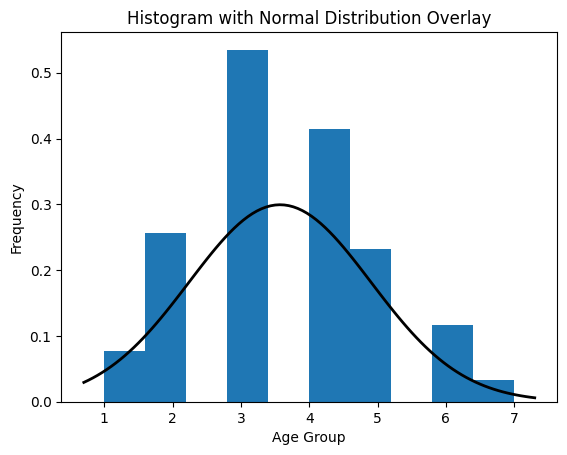

In [ ]:
import pandas as pd
from scipy.stats import shapiro
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


#age

data = df_cleaned["age_group_id"]

# Perform Shapiro-Wilk test
stat, p = shapiro(data)

print('Statistic=%.3f, p-value=%.3f' % (stat, p))

# Set the significance level
alpha = 0.05

# Interpret the results
if p > alpha:
    print(' The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')


plt.hist(data, bins=10, density=True)
mu, std = norm.fit(data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Set plot title and labels
plt.title("Histogram with Normal Distribution Overlay")
plt.xlabel("Age Group")
plt.ylabel("Frequency")

# Show the plot
plt.show()


### Variable: Occurrence

In [ ]:
#drop rows with missing values only for the Occurrence_Category column
df = df.dropna(subset=['Occurrence_Category'])
occurrence_counts = df['Occurrence_Category'].value_counts()

#calculate percentage for each age group
occurrence_p = occurrence_counts / len(df) * 100

#create table
table_0 = pd.DataFrame({'Count': occurrence_counts, 'Percentage': occurrence_p})
table_0.index.name = 'Occurrence Category'

print(table_0)


                                                 Count  Percentage
Occurrence Category                                               
Assault                                           7724   11.868834
Assault & Other crimes against persons            7234   11.115892
Robbery & Theft                                   4579    7.036172
Warrant                                           4377    6.725775
FTA/FTC/Compliance Check/Parollee                 4244    6.521405
Police Category - Administrative                  3885    5.969759
FTA/FTC, Compliance Check & Parollee              3876    5.955930
Robbery/Theft                                     3752    5.765389
Drug Related                                      2751    4.227235
Other Statute & Other Incident Type               2338    3.592612
Vehicle Related (inc. Impaired)                   1977    3.037893
Other Offence                                     1972    3.030210
Mischief & Fraud                                  1732    2.66

Prepare the dataset for research question: Does the occurrence category of the arrest significantly impact the likelihood of strip searches?

In [ ]:
#filter the data
df_occurrence = df[["Sex", "Occurrence_Category", "StripSearch"]]

#convert categorical variables into numerical data - binary (0 or 1) 
df_occurrence = pd.get_dummies(df_occurrence, columns=["Occurrence_Category"])
df_occurrence

,Sex,StripSearch,Occurrence_Category_Assault,Occurrence_Category_Assault & Other crimes against persons,Occurrence_Category_Break & Enter,Occurrence_Category_Break and Enter,Occurrence_Category_Crimes against Children,Occurrence_Category_Drug Related,"Occurrence_Category_FTA/FTC, Compliance Check & Parollee",Occurrence_Category_FTA/FTC/Compliance Check/Parollee,...,Occurrence_Category_Police Category - Incident,Occurrence_Category_Robbery & Theft,Occurrence_Category_Robbery/Theft,Occurrence_Category_Sexual Related Crime,Occurrence_Category_Sexual Related Crimes & Crimes Against Children,Occurrence_Category_Vehicle Related,Occurrence_Category_Vehicle Related (inc. Impaired),Occurrence_Category_Warrant,Occurrence_Category_Weapons,Occurrence_Category_Weapons & Homicide
0,M,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,F,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
65272,M,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65273,F,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65274,M,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


#define the columns
col_percentage = ["Actions_at_arrest___Concealed_i", "Actions_at_arrest___Combative__",
                      "Actions_at_arrest___Resisted__d", "Actions_at_arrest___Mental_inst",
                      "Actions_at_arrest___Assaulted_o", "Actions_at_arrest___Cooperative"]

#store the results
results = {}

#loop through each column, calculate the percentage
for col in col_percentage:
    value_counts = df[col].value_counts()
    results[col] = dict(value_counts / len(df) * 100)

#print the percentages for each column
for col, percentages in results.items():
    print(f"Percentages for column {col}:")
    for value, percentage in percentages.items():
        print(f"{value}: {percentage:.2f}%")


Percentages for column Actions_at_arrest___Concealed_i:
0: 99.59%
1: 0.41%
Percentages for column Actions_at_arrest___Combative__:
0: 95.59%
1: 4.41%
Percentages for column Actions_at_arrest___Resisted__d:
0: 96.18%
1: 3.82%
Percentages for column Actions_at_arrest___Mental_inst:
0: 96.67%
1: 3.33%
Percentages for column Actions_at_arrest___Assaulted_o:
0: 99.37%
1: 0.63%
Percentages for column Actions_at_arrest___Cooperative:
0: 55.38%
1: 44.62%


###Variable: Race

In [ ]:
df_race = pd.read_csv('Ars.csv')
race_counts = df_race['Perceived_Race'].value_counts()
race_counts

race_percents = (race_counts / len(df_race)) * 100

# Combine the value counts and percentages into a new DataFrame
race_df = pd.DataFrame({'Counts': race_counts, 'Percentages': race_percents})

# Print the new DataFrame
print(race_df)

                      Counts  Percentages
White                  27723    42.470433
Black                  17526    26.849072
Unknown or Legacy       5056     7.745573
East/Southeast Asian    4415     6.763588
South Asian             3613     5.534959
Middle-Eastern          3237     4.958944
Indigenous              1934     2.962804
Latino                  1768     2.708499


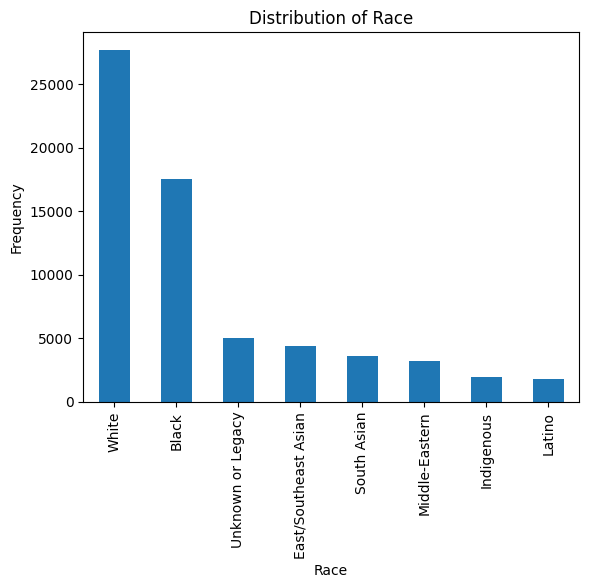

In [ ]:
import pandas as pd
import seaborn as sns

race_counts.plot(kind='bar')
plt.title('Distribution of Race')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.show()

### Bar plots: selected variables  

<Figure size 640x480 with 0 Axes>

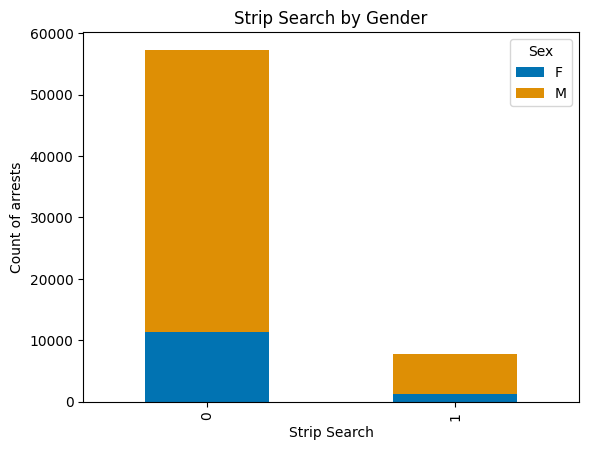

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#create bar plot strip search vs sex
sns.set_palette("colorblind")
plt.figure()
df.groupby(['StripSearch', 'Sex'])['StripSearch'].count().unstack().plot(kind='bar', stacked=True)

plt.xlabel('Strip Search')
plt.ylabel('Count of arrests')
plt.title('Strip Search by Gender')
plt.show()

<Figure size 640x480 with 0 Axes>

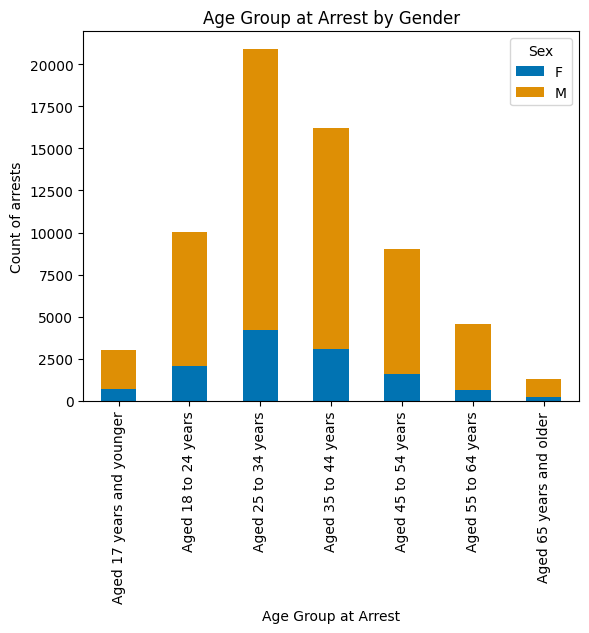

In [ ]:
#create bar plot age group and sex 
plt.figure()
df.groupby(['Age_group__at_arrest_', 'Sex'])['Age_group__at_arrest_'].count().unstack().plot(kind='bar', stacked=True)

plt.xlabel('Age Group at Arrest')
plt.ylabel('Count of arrests')
plt.title('Age Group at Arrest by Gender')
plt.show()

###T-test

####Age as a factor for actions at arrest
Are there significant differences in the actions at arrest across different age groups (under 17/over 65 vs middle aged)?

In [ ]:
df_cleaned = pd.read_csv('cleaned_Ars.csv')
df_cleaned


,Age_group__at_arrest_,Sex,Perceived_Race,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,Occurrence_Category,StripSearch,age_group_id
0,Aged 35 to 44 years,M,White,0,0,0,0,0,1,Assault & Other crimes against persons,0,4
1,Aged 35 to 44 years,M,White,0,0,0,0,0,0,Assault & Other crimes against persons,0,4
2,Aged 35 to 44 years,M,Unknown or Legacy,0,0,0,0,0,0,Assault & Other crimes against persons,0,4
3,Aged 25 to 34 years,M,Black,0,0,0,0,0,0,Harassment/Threatening,0,3
4,Aged 25 to 34 years,M,South Asian,0,0,0,0,0,0,FTA/FTC/Compliance Check/Parollee,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
65238,Aged 25 to 34 years,F,Indigenous,0,0,1,0,0,0,Vehicle Related,0,3
65239,Aged 35 to 44 years,M,South Asian,0,0,0,0,0,0,Assault,0,4
65240,Aged 45 to 54 years,F,White,0,0,0,0,0,0,Assault,0,5
65241,Aged 17 years and younger,M,Unknown or Legacy,0,0,0,0,0,1,Robbery/Theft,0,1


In [ ]:
# Divide age groups to two (17 and younger or 65 and older, and others)
# H0: there is no significant difference in the means of actions at arrest across different two age group
# H1: there is a significant difference.
from scipy.stats import ttest_ind

# divide age groups into two categories
df_cleaned['age_group_category'] = df_cleaned['age_group_id'].apply(lambda x: '17 or younger or 65 or older' if x in [1, 7] else 'Others')

# select the columns of interest
cols = ['Actions_at_arrest___Concealed_i', 'Actions_at_arrest___Combative__', 
        'Actions_at_arrest___Resisted__d', 'Actions_at_arrest___Mental_inst', 
        'Actions_at_arrest___Assaulted_o', 'Actions_at_arrest___Cooperative']
data = df_cleaned[cols]

# perform t-test for each action at arrest
for col in cols:
    group1 = data[df_cleaned['age_group_category'] == '17 or younger or 65 or older'][col]
    group2 = data[df_cleaned['age_group_category'] == 'Others'][col]
    t, p = ttest_ind(group1, group2)
    print('Action at arrest:', col)
    print('t-statistic:', t)
    print('p-value:', p)

    # determine the significance
    alpha = 0.05
    if p < alpha:
        print('Reject null hypothesis')
    else:
        print('Fail to reject null hypothesis')
    print('------------------------')



Action at arrest: Actions_at_arrest___Concealed_i
t-statistic: 1.7725713175834015
p-value: 0.07630443347954129
Fail to reject null hypothesis
------------------------
Action at arrest: Actions_at_arrest___Combative__
t-statistic: -6.836859717065651
p-value: 8.165714719254134e-12
Reject null hypothesis
------------------------
Action at arrest: Actions_at_arrest___Resisted__d
t-statistic: -3.283630298956931
p-value: 0.0010253317060983714
Reject null hypothesis
------------------------
Action at arrest: Actions_at_arrest___Mental_inst
t-statistic: -8.780565516331258
p-value: 1.6649687683703979e-18
Reject null hypothesis
------------------------
Action at arrest: Actions_at_arrest___Assaulted_o
t-statistic: -1.7264804162226421
p-value: 0.08426575352170958
Fail to reject null hypothesis
------------------------
Action at arrest: Actions_at_arrest___Cooperative
t-statistic: 3.6136292150974945
p-value: 0.00030216763607962495
Reject null hypothesis
------------------------


####Sex as a factor for actions at arrest

In [ ]:
import pandas as pd
import scipy.stats as stats

#perform t test between sex and each actions at arrest
table = pd.crosstab(df_cleaned['Actions_at_arrest___Mental_inst'], df_cleaned['Sex'])

#define the action columns
action_cols = ['Actions_at_arrest___Concealed_i', 'Actions_at_arrest___Combative__',
               'Actions_at_arrest___Resisted__d', 'Actions_at_arrest___Mental_inst',
               'Actions_at_arrest___Assaulted_o', 'Actions_at_arrest___Cooperative']

#loop through each action column
for col in action_cols:
    # Create a contingency table of the action column and sex
    table = pd.crosstab(df_cleaned[col], df_cleaned['Sex'])

    # t-test
    t_stat, p_value = stats.ttest_ind(table.iloc[:,0], table.iloc[:,1])

    #results
    print('Action:', col)
    print('T-statistic: {:.2f}'.format(t_stat))
    print('P-value: {:.4f}'.format(p_value))

    #significance
    alpha = 0.05
    if p_value < alpha:
        print('Reject null hypothesis')
    else:
        print('Fail to reject null hypothesis')
    print('------------------------')

Action: Actions_at_arrest___Concealed_i
T-statistic: -0.75
P-value: 0.5333
Fail to reject null hypothesis
------------------------
Action: Actions_at_arrest___Combative__
T-statistic: -0.81
P-value: 0.5026
Fail to reject null hypothesis
------------------------
Action: Actions_at_arrest___Resisted__d
T-statistic: -0.80
P-value: 0.5067
Fail to reject null hypothesis
------------------------
Action: Actions_at_arrest___Mental_inst
T-statistic: -0.79
P-value: 0.5121
Fail to reject null hypothesis
------------------------
Action: Actions_at_arrest___Assaulted_o
T-statistic: -0.75
P-value: 0.5322
Fail to reject null hypothesis
------------------------
Action: Actions_at_arrest___Cooperative
T-statistic: -7.18
P-value: 0.0188
Reject null hypothesis
------------------------


####Sex as a factor for strip search 

In [ ]:
# Does sex significantly impact the likelihood of strip searches?
# •	H0: There is no difference in the likelihood of strip searches between males and females.
# •	H1: There is a significant difference in the likelihood of strip searches between males and females.
# T test
import pandas as pd
import scipy.stats as stats

#load the cleaned dataset
df_cleaned = pd.read_csv('cleaned_Ars.csv')

#create a contingency table of strip searches by sex
table = pd.crosstab(df_cleaned['StripSearch'], df_cleaned['Sex'])

# Perform the t-test
t_stat, p_value = stats.ttest_ind(table.iloc[:,0], table.iloc[:,1])

# Print the results
print('T-statistic: {:.2f}'.format(t_stat))
print('P-value: {:.2f}'.format(p_value))

# Determine the significance
alpha = 0.05
if p_value < alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

T-statistic: -0.98
P-value: 0.43
Fail to reject null hypothesis


####Occurrence as a factor for strip search
Explore our hypothesis: The occurrence category of the arrest will significantly impact the likelihood of a strip search, drug-related and weapon-relating occurrences are associated with a higher likelihood of a strip search.

In [ ]:
# Does drug-related or weapon-relating occurrences significantly impact the likelihood of strip searches?
# Combine "Weapons & Homicide','Weapons','Drug Related' as one group called drug-related or weapon-related and the rest to group "others" to perform t test
# •	H0: There is no difference in the likelihood of strip searches between drug-related or weapon-related crime and Others. 
# •	H1: There is a significant difference in the likelihood of strip searches between drug-related or weapon-related crime and others. 


# Create a new column that assign weapon and drug or other categories 
df_cleaned['Group'] = df_cleaned['Occurrence_Category'].apply(lambda x: 'Weapons or Drug Related' if x in ['Weapons & Homicide','Weapons','Drug Related'] else 'Others')

# Subset the dataframe to only include the necessary columns
subset_df = df_cleaned[['StripSearch', 'Group']]


# Calculate the mean strip search rate for each group
weapon_drug_mean = subset_df.loc[subset_df['Group'] == 'Weapons or Drug Related', 'StripSearch'].mean()
others_mean = subset_df.loc[subset_df['Group'] == 'Others', 'StripSearch'].mean()

# Perform t-test
t_stat, p_value = stats.ttest_ind(subset_df.loc[subset_df['Group'] == 'Weapons or Drug Related', 'StripSearch'], subset_df.loc[subset_df['Group'] == 'Others', 'StripSearch'], equal_var=False)

#print results
print('Weapons or Drug Related vs. Others: t-statistic = {:.2f}, p-value = {:.4f}'.format(t_stat, p_value))

# Determine the significance
alpha = 0.05
if p_value < alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')


Weapons or Drug Related vs. Others: t-statistic = 32.58, p-value = 0.0000
Reject null hypothesis


In [ ]:
#create a table that shows the portion of the weapon/drug related occurrence in the dataset.
occurrence_counts2 = df_cleaned['Group'].value_counts()

#calculate percentage for each age group
occurrence_p2 = occurrence_counts2 / len(df) * 100

#create table
table_o2 = pd.DataFrame({'Count': occurrence_counts2, 'Percentage': occurrence_p2})
table_o2.index.name = 'Occurrence Category'

print(table_o2)


                         Count  Percentage
Occurrence Category                       
Others                   60281   92.628845
Weapons or Drug Related   4962    7.624697


# 3.Methods

### Power Analysis

Help us understand the sample size required to detect a difference in actions at arrest between the two age groups (under 17/over 65 vs middle aged)

In [ ]:
df_cleaned['action'] = df_cleaned['Actions_at_arrest___Assaulted_o'] + df_cleaned['Actions_at_arrest___Combative__'] + df_cleaned['Actions_at_arrest___Concealed_i'] + df_cleaned['Actions_at_arrest___Cooperative'] + df_cleaned['Actions_at_arrest___Mental_inst'] + df_cleaned['Actions_at_arrest___Resisted__d']

Effect size (Cohen's D) for actions at arrest: -0.049220883452969065
Sample Size of nobs1: 48436.533 needed for g2a
Actual size of g2a: 60879
Sample Size of nobs2: 3472.084 needed for g1a
Actual size of g1a: 4364


/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


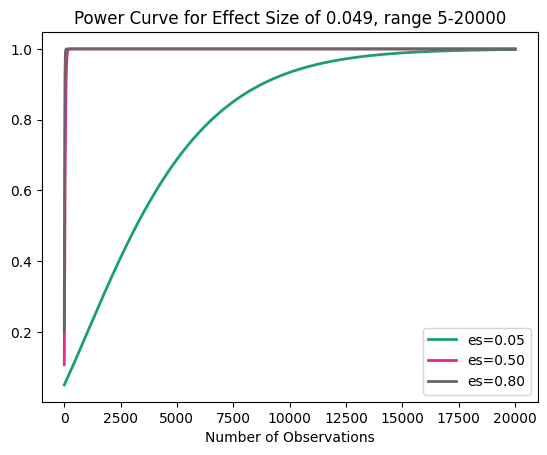

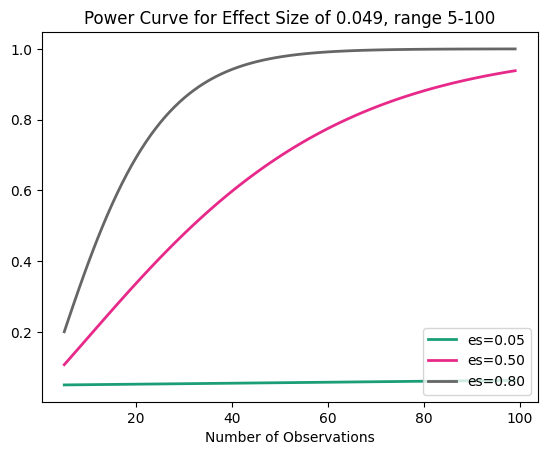

In [ ]:
import numpy as np
df_cleaned['age'] = df_cleaned['Age_group__at_arrest_'].isin(['Aged 17 years and under', 'Aged 17 years and younger', 'Aged 65 years and older'])
df_cleaned['age'] = df_cleaned['age'].replace({True: '<17 or >65', False: '17<age<65'})

# Code for Cohen's D 

# Function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(sample1,sample2):
    #calculate the sample size
    n1, n2 = len(sample1), len(sample2)
    #calculate the variances
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

# function to calculate Cohen's d for independent samples
def Cohens_d(sample1, sample2):
    u1, u2 = np.mean(sample1), np.mean(sample2)
    s_pooled = pooled_standard_deviation(sample1, sample2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

# Create two different datasets
group1 = df_cleaned[df_cleaned['age']=='<17 or >65']
group2 = df_cleaned[df_cleaned['age'] =='17<age<65']
g1a = group1['action']
g2a = group2['action']

# Conduct power analysis
effect_size = Cohens_d(g1a, g2a)
alpha = 0.05
power = 0.8
ratio_ = len(g1a)/len(g2a) # NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for actions at arrest:', effect_size)

# Calculate sample size
from statsmodels.stats.power import TTestIndPower
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for g2a') 
print('Actual size of g2a:', len(g2a))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for g1a')
print('Actual size of g1a:', len(g1a))

# Plot power curve 1
effect_sizes = np.array([0.049, 0.5, 0.8])
sample_sizes = np.array(range(5, 20000))
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.title("Power Curve for Effect Size of 0.049, range 5-20000")
plt.show()

# Plot power curve 2
effect_sizes = np.array([0.049, 0.5, 0.8])
sample_sizes = np.array(range(5, 100))
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.title("Power Curve for Effect Size of 0.049, range 5-100")
plt.show()



### ANCOVA

In [ ]:
df_cleaned

,Age_group__at_arrest_,Sex,Perceived_Race,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,Occurrence_Category,StripSearch,age_group_id,Group,action,age
0,Aged 35 to 44 years,M,White,0,0,0,0,0,1,Assault & Other crimes against persons,0,4,Others,1,17<age<65
1,Aged 35 to 44 years,M,White,0,0,0,0,0,0,Assault & Other crimes against persons,0,4,Others,0,17<age<65
2,Aged 35 to 44 years,M,Unknown or Legacy,0,0,0,0,0,0,Assault & Other crimes against persons,0,4,Others,0,17<age<65
3,Aged 25 to 34 years,M,Black,0,0,0,0,0,0,Harassment/Threatening,0,3,Others,0,17<age<65
4,Aged 25 to 34 years,M,South Asian,0,0,0,0,0,0,FTA/FTC/Compliance Check/Parollee,0,3,Others,0,17<age<65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65238,Aged 25 to 34 years,F,Indigenous,0,0,1,0,0,0,Vehicle Related,0,3,Others,1,17<age<65
65239,Aged 35 to 44 years,M,South Asian,0,0,0,0,0,0,Assault,0,4,Others,0,17<age<65
65240,Aged 45 to 54 years,F,White,0,0,0,0,0,0,Assault,0,5,Others,0,17<age<65
65241,Aged 17 years and younger,M,Unknown or Legacy,0,0,0,0,0,1,Robbery/Theft,0,1,Others,1,<17 or >65


In [ ]:
#import package
!pip install pingouin
from pingouin import ancova
df_cleaned['action'] = 1
conv = {'White':0, 'Unknown or Legacy':1, 'Black':2, 'South Asian':3,
        'Indigenous':4, 'Middle-Eastern':5, 'Latino':6, 'East/Southeast Asian':7}
df_cleaned['Sex'] = df_cleaned['Sex'].replace({'M':1,'F':0})
df_cleaned['Perceived_Race'] = df_cleaned['Perceived_Race'].replace(conv)
ancova(data=df_cleaned, dv='action', covar=['Sex', 'Perceived_Race'], between='age')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=0610cefdeff2e8d248650031cc5a7b971e5c426642ef8dffede098e1bc03ea01
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


,Source,SS,DF,F,p-unc,np2
0,age,1.884109e-26,1,985.336594,1.108265e-214,0.014880
1,Sex,1.994130e-26,1,1042.874548,5.365110e-227,0.015735
2,Perceived_Race,4.243441e-27,1,221.920185,4.169341e-50,0.003390
3,Residual,1.247389e-24,65235,NaN,NaN,NaN


### Logistic Regression

####Preperation 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

#create new dataframe with the two selected variables 
data_log = df_cleaned[['Occurrence_Category','StripSearch']]
data_log

,Occurrence_Category,StripSearch
0,Assault & Other crimes against persons,0
1,Assault & Other crimes against persons,0
2,Assault & Other crimes against persons,0
3,Harassment/Threatening,0
4,FTA/FTC/Compliance Check/Parollee,0
...,...,...
65238,Vehicle Related,0
65239,Assault,0
65240,Assault,0
65241,Robbery/Theft,0


In [ ]:
#Assumption check: Check for multilinearity 
#Calculate the correlation coefficients between each pair of variables
corr_matrix = data_log.corr(numeric_only=True)
print(corr_matrix)

             StripSearch
StripSearch          1.0


In [ ]:
#convert occurrence category into dummy variables 
data_log = pd.get_dummies(data_log, columns=['Occurrence_Category'])

# separate the data into X and y
X = data_log.drop(['StripSearch'], axis=1)
y = data_log['StripSearch']



####Logistic Regression

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)


In [ ]:
#information about the size and the characteristics of the training and testing data 

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print("\n========== Training data ==========")
display(y_train.describe().T)
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print("\n========== Test data ==========")
display(y_test.describe().T)

X_train shape: (52194, 31)
y_train shape: (52194,)

========== Training data ==========


count    52194.000000
mean         0.119209
std          0.324038
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: StripSearch, dtype: float64

X_test shape: (13049, 31)
y_test shape: (13049,)

========== Test data ==========


count    13049.000000
mean         0.121005
std          0.326146
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: StripSearch, dtype: float64

In [ ]:
# apply the logistic model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = list(map(round, y_pred))


# get the result
logit_model=sm.Logit(y_train, X_train)


result=logit_model.fit()
print(result.summary())

         Current function value: 0.291286
         Iterations: 35


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:            StripSearch   No. Observations:                52194
Model:                          Logit   Df Residuals:                    52163
Method:                           MLE   Df Model:                           30
Date:                Fri, 14 Apr 2023   Pseudo R-squ.:                  0.2027
Time:                        21:00:57   Log-Likelihood:                -15203.
converged:                      False   LL-Null:                       -19069.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
Occurrence_Category_Assault                                            -4.3268      0.113    -38

In [ ]:
#accuracy score 
print("Accuracy score:", accuracy_score(y_test, y_pred))

#confusion matrix
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy score: 0.878994558970036
Confusion matrix:
 [[11470     0]
 [ 1579     0]]
